In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
train.drop(['Loan_ID'],inplace=True,axis=1)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [0]:
corr_matrix = train.corr()

In [0]:
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [0]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [0]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [0]:
train['Income_cat'] = np.ceil(train['ApplicantIncome']/2000)
train['Income_cat'].where(train['Income_cat']<6,6,inplace=True)

In [0]:
train['Income_cat'].value_counts()

2.0    293
3.0    143
4.0     54
6.0     52
1.0     41
5.0     31
Name: Income_cat, dtype: int64

In [0]:
a = train[['LoanAmount','Income_cat']].groupby(['Income_cat']).mean()
a

,LoanAmount
Income_cat,
1.0,107.974359
2.0,115.339223
3.0,143.942446
4.0,178.803922
5.0,211.451613
6.0,288.612245


In [0]:
train.Income_cat.value_counts()
    

2.0    293
3.0    143
4.0     54
6.0     52
1.0     41
5.0     31
Name: Income_cat, dtype: int64

In [0]:
def fill_loan_amt(df):
    cat = df[1]
    amt = df[0]
    if pd.isnull(amt):
        if cat == 1:
            return means[0][0]
        elif cat==2:
            return means[1][0]
        elif cat==3:
            return means[2][0]
        elif cat==4:
            return means[3][0]
        elif cat==5:
            return means[4][0]
        else:
            return means[5][0]
    else:
        return amt
    

In [0]:
means = train[['LoanAmount','Income_cat']].groupby(['Income_cat']).mean().values
train['LoanAmount'] = train[['LoanAmount','Income_cat']].apply(fill_loan_amt,axis=1)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Income_cat         614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [0]:
gender={'Male':0,'Female':1}
married = {'No':0,'Yes':1}
dep = {'0':0,'1':1,'2':2,'3+':3}
ed = {'Graduate':1,'Not Graduate':0}
area={'Rural':0,'Semiurban':1,'Urban':2}
train['Gender'] = train['Gender'].map(gender)
train['Married'] = train['Married'].map(married)
train['Self_Employed'] = train['Self_Employed'].map(married)
train['Dependents'] = train['Dependents'].map(dep)
train['Education']= train['Education'].map(ed)
train['Property_Area']=train['Property_Area'].map(area)

lbl_cat = {'Y':1,'N':0}
y = np.array(train['Loan_Status'].map(lbl_cat))

train.drop(['Loan_Status','Income_cat'],axis=1,inplace=True)

In [0]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
miss_iter = IterativeImputer()
miss =miss_iter.fit_transform(train)
miss = np.around(miss)


In [0]:
gen,mar,dep,empl,cred =  miss[:,0],miss[:,1],miss[:,2],miss[:,4],miss[:,9]

train['Gender'] = gen
train['Married'] = mar
train['Dependents'] = dep
train['Self_Employed'] = empl
train['Credit_History']= cred

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 52.9 KB


In [0]:
test = pd.read_csv('test_lAUu6dG.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [0]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['Income_cat'] = np.ceil(test['ApplicantIncome']/2000)
test['Income_cat'].where(test['Income_cat']<6,6,inplace=True)
means = test[['LoanAmount','Income_cat']].groupby(['Income_cat']).mean().values
test['LoanAmount'] = test[['LoanAmount','Income_cat']].apply(fill_loan_amt,axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Income_cat         367 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 37.4+ KB


In [0]:
gender={'Male':0,'Female':1}
married = {'No':0,'Yes':1}
dep = {'0':0,'1':1,'2':2,'3+':3}
ed = {'Graduate':1,'Not Graduate':0}
area={'Rural':0,'Semiurban':1,'Urban':2}
test['Gender'] = test['Gender'].map(gender)
test['Married'] = test['Married'].map(married)
test['Self_Employed'] = test['Self_Employed'].map(married)
test['Dependents'] = test['Dependents'].map(dep)
test['Education']= test['Education'].map(ed)
test['Property_Area']=test['Property_Area'].map(area)


test.drop(['Income_cat','Loan_ID'],axis=1,inplace=True)

In [0]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
miss_iter = IterativeImputer()
miss =miss_iter.fit_transform(test)
miss = np.around(miss)



In [0]:
gen,mar,dep,empl,cred =  miss[:,0],miss[:,1],miss[:,2],miss[:,4],miss[:,9]

test['Gender'] = gen
test['Married'] = mar
test['Dependents'] = dep
test['Self_Employed'] = empl
test['Credit_History']= cred

In [0]:
from fastai.tabular import *

In [0]:
cat_names = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
cont_names = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
procs = FillMissing,Categorify,Normalize
dep_var = 'Loan_Status'

In [0]:
train1 = pd.read_csv('train_ctrUa4K.csv')
train_tab = train.copy()
train_tab['Loan_Status'] = train1['Loan_Status']

In [0]:
test = TabularList.from_df(test,cat_names=cat_names,cont_names=cont_names)

In [0]:
data = TabularList.from_df(train_tab,cat_names=cat_names,cont_names=cont_names,procs=procs).split_by_idx(valid_idx= range(len(train_tab)-124,len(train_tab))).label_from_df(cols=dep_var).add_test(test).databunch()

In [0]:
data.show_batch()


Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,target
0.0,1.0,2.0,1,1.0,1.0,2,-0.3330,0.9295,-0.6875,0.2643,Y
0.0,1.0,1.0,1,0.0,1.0,1,-0.3332,-0.7008,-0.5904,0.2643,Y
0.0,0.0,0.0,0,0.0,1.0,0,-0.0937,-0.7008,-1.1735,0.2643,Y
0.0,0.0,0.0,1,1.0,1.0,2,0.2545,-0.7008,-0.2016,0.2643,Y
0.0,0.0,0.0,1,0.0,1.0,2,-0.5643,-0.1358,-1.1857,0.2643,Y


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


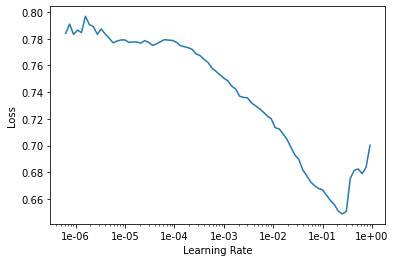

In [0]:
learn = tabular_learner(data,layers = [200,100],metrics=accuracy)

learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,4e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.770941,0.646093,0.653226,00:00
1,0.678341,0.556333,0.806452,00:00
2,0.610963,0.546777,0.782258,00:00
3,0.573982,0.618921,0.750000,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


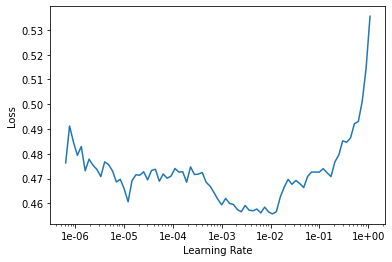

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,4e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.479754,0.576924,0.774194,00:00
1,0.454211,0.532361,0.798387,00:00
2,0.441950,0.533725,0.798387,00:00
3,0.432660,0.529237,0.798387,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


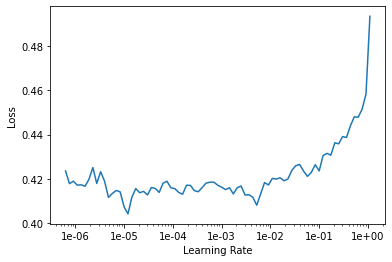

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.411209,0.556181,0.806452,00:00
1,0.414856,0.559213,0.798387,00:00
2,0.419846,0.570787,0.806452,00:00
3,0.419175,0.571822,0.806452,00:00


In [0]:
preds = learn.get_preds(ds_type=DatasetType.Test)[0][:,1].numpy()
preds

array([0.769809, 0.707289, 0.668397, 0.878189, ..., 0.79982 , 0.934916, 0.773538, 0.91149 ], dtype=float32)

In [0]:
pred =np.around(preds)
pred

array([1., 1., 1., 1., ..., 1., 1., 1., 1.], dtype=float32)

In [0]:
submission = pd.read_csv('sample_submission_49d68Cx (1).csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [0]:
d = {0:'N',1:'Y'}
submission['Loan_Status'] =pred 
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [0]:
submission['Loan_Status'].value_counts()

1.0    305
0.0     62
Name: Loan_Status, dtype: int64

In [0]:
submission['Loan_Status'] = submission['Loan_Status'].map(d)

In [0]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [0]:
submission.to_csv('sub_1.csv')

In [0]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,143.942446,360.0,1.0,2
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2


In [0]:
import seaborn as sns

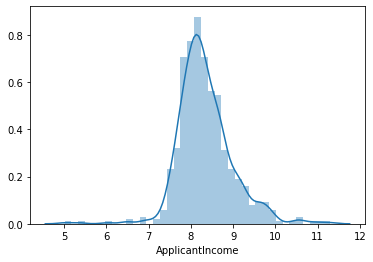

In [0]:
sns.distplot(np.log(train['ApplicantIncome']))

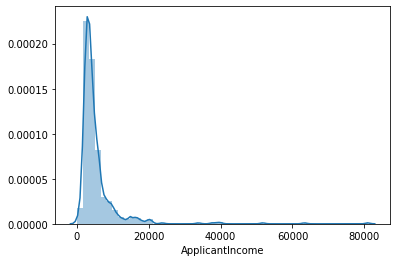

In [0]:
sns.distplot(train['ApplicantIncome'])